#Here the model has been retrained with cutout

###Validation accuracy improved from 84.13% to 85.96%

In [0]:
from keras import backend as K
import time
import matplotlib.pyplot as plt
import numpy as np
% matplotlib inline
np.random.seed(2017) 
from keras.models import Sequential
from keras.layers.convolutional import Convolution2D, MaxPooling2D
from keras.layers import Activation, Flatten, Dense, Dropout
from keras.layers.normalization import BatchNormalization
from keras.utils import np_utils

Using TensorFlow backend.


In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

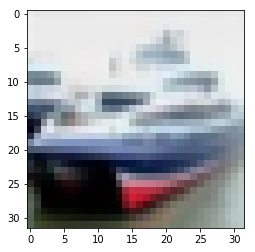

In [0]:
plt.imshow(test_features[1])

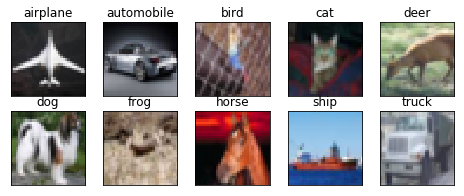

In [0]:
class_names = ['airplane','automobile','bird','cat','deer',
               'dog','frog','horse','ship','truck']
fig = plt.figure(figsize=(8,3))
for i in range(num_classes):
    ax = fig.add_subplot(2, 5, 1 + i, xticks=[], yticks=[])
    idx = np.where(train_labels[:]==i)[0]
    features_idx = train_features[idx,::]
    img_num = np.random.randint(features_idx.shape[0])
    im = features_idx[img_num]
    ax.set_title(class_names[i])
    plt.imshow(im)
plt.show()

In [0]:
def plot_model_history(model_history):
    fig, axs = plt.subplots(1,2,figsize=(15,5))
    # summarize history for accuracy
    axs[0].plot(range(1,len(model_history.history['acc'])+1),model_history.history['acc'])
    axs[0].plot(range(1,len(model_history.history['val_acc'])+1),model_history.history['val_acc'])
    axs[0].set_title('Model Accuracy')
    axs[0].set_ylabel('Accuracy')
    axs[0].set_xlabel('Epoch')
    axs[0].set_xticks(np.arange(1,len(model_history.history['acc'])+1),len(model_history.history['acc'])/10)
    axs[0].legend(['train', 'val'], loc='best')
    # summarize history for loss
    axs[1].plot(range(1,len(model_history.history['loss'])+1),model_history.history['loss'])
    axs[1].plot(range(1,len(model_history.history['val_loss'])+1),model_history.history['val_loss'])
    axs[1].set_title('Model Loss')
    axs[1].set_ylabel('Loss')
    axs[1].set_xlabel('Epoch')
    axs[1].set_xticks(np.arange(1,len(model_history.history['loss'])+1),len(model_history.history['loss'])/10)
    axs[1].legend(['train', 'val'], loc='best')
    plt.show()

In [0]:
def accuracy(test_x, test_y, model):
    result = model.predict(test_x)
    predicted_class = np.argmax(result, axis=1)
    true_class = np.argmax(test_y, axis=1)
    num_correct = np.sum(predicted_class == true_class) 
    accuracy = float(num_correct)/result.shape[0]
    return (accuracy * 100)

In [0]:
train_features = train_features.astype('float32')/255
test_features = test_features.astype('float32')/255
# convert class labels to binary class labels
train_labels = np_utils.to_categorical(train_labels, num_classes)
test_labels = np_utils.to_categorical(test_labels, num_classes)

In [0]:
from keras.layers import Activation
from keras.layers import BatchNormalization

# Define the model
model = Sequential()
model.add(Convolution2D(48, 3, 3, border_mode='same', input_shape=(32, 32, 3)))   #GRF-3
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(48, 3, 3))    #GRF - 5
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))   #GRF-10

model.add(Convolution2D(96, 3, 3, border_mode='same')) #GRF-12
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(96, 3, 3))  #GRF-14
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))  #GRF -28

model.add(Convolution2D(192, 3, 3, border_mode='same')) #GRF -30
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(192, 3, 3,border_mode='same')) #GRF-32
model.add(BatchNormalization())
model.add(Activation('relu'))
model.add(Dropout(0.2))

model.add(MaxPooling2D(pool_size=(2, 2)))  #GRF -64
model.add(Convolution2D(48, 1, 1) )         #GRF-65

model.add(Convolution2D(48,3,3,border_mode='same'))  #GRF-67
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 1,1)) #GRF-68
model.add(BatchNormalization())
model.add(Activation('relu'))

model.add(Convolution2D(10, 3))
model.add(Flatten())
model.add(Activation('softmax'))

W0630 06:41:54.041181 140373945829248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:6: UserWarning: Update your `Conv2D` call to the Keras 2 API: `Conv2D(48, (3, 3), input_shape=(32, 32, 3..., padding="same")`
  
W0630 06:41:54.057868 140373945829248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0630 06:41:54.060772 140373945829248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0630 06:41:54.094832 140373945829248 deprecation_wrapper.py:119] From /usr/local/lib/python3.

In [0]:

model.compile(optimizer='adam', loss='categorical_crossentropy', metrics=['accuracy'])
model.summary()

W0630 06:41:58.585354 140373945829248 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/optimizers.py:790: The name tf.train.Optimizer is deprecated. Please use tf.compat.v1.train.Optimizer instead.



_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d_1 (Conv2D)            (None, 32, 32, 48)        1344      
_________________________________________________________________
batch_normalization_1 (Batch (None, 32, 32, 48)        192       
_________________________________________________________________
activation_1 (Activation)    (None, 32, 32, 48)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 30, 30, 48)        20784     
_________________________________________________________________
batch_normalization_2 (Batch (None, 30, 30, 48)        192       
_________________________________________________________________
activation_2 (Activation)    (None, 30, 30, 48)        0         
_________________________________________________________________
dropout_1 (Dropout)          (None, 30, 30, 48)        0         
__________

In [0]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Drive already mounted at /content/gdrive; to attempt to forcibly remount, call drive.mount("/content/gdrive", force_remount=True).


In [0]:
cd gdrive/My\ Drive

/content/gdrive/My Drive


In [0]:
cd  Assignment9B

/content/gdrive/My Drive/Assignment9B


In [0]:
from keras.callbacks import *
filepath="/content/gdrive/My Drive/Assignment9B/epochs:{epoch:03d}-val_acc:{val_acc:.3f}.hdf5"
checkpoint = ModelCheckpoint(filepath, monitor='val_acc', verbose=1, save_best_only=True, mode='max')
callbacks_list = [checkpoint]

In [0]:
import numpy as np


def get_random_eraser(p=0.5, s_l=0.02, s_h=0.4, r_1=0.3, r_2=1/0.3, v_l=0, v_h=255, pixel_level=False):
    def eraser(input_img):
        img_h, img_w, img_c = input_img.shape
        p_1 = np.random.rand()

        if p_1 > p:
            return input_img

        while True:
            s = np.random.uniform(s_l, s_h) * img_h * img_w
            r = np.random.uniform(r_1, r_2)
            w = int(np.sqrt(s / r))
            h = int(np.sqrt(s * r))
            left = np.random.randint(0, img_w)
            top = np.random.randint(0, img_h)

            if left + w <= img_w and top + h <= img_h:
                break

        if pixel_level:
            c = np.random.uniform(v_l, v_h, (h, w, img_c))
        else:
            c = np.random.uniform(v_l, v_h)

        input_img[top:top + h, left:left + w, :] = c

        return input_img

    return eraser

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: The semantics of the Keras 2 argument `steps_per_epoch` is not the same as the Keras 1 argument `samples_per_epoch`. `steps_per_epoch` is the number of batches to draw from the generator at each epoch. Basically steps_per_epoch = samples_per_epoch/batch_size. Similarly `nb_val_samples`->`validation_steps` and `val_samples`->`steps` arguments have changed. Update your method calls accordingly.
  
/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:14: UserWarning: Update your `fit_generator` call to the Keras 2 API: `fit_generator(<keras_pre..., callbacks=[<keras.ca..., validation_data=(array([[[..., verbose=0, steps_per_epoch=390, epochs=100)`
  
W0630 06:43:55.763936 140373945829248 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a


Epoch 00001: val_acc improved from -inf to 0.60370, saving model to /content/gdrive/My Drive/Assignment9B/epochs:001-val_acc:0.604.hdf5

Epoch 00002: val_acc improved from 0.60370 to 0.69780, saving model to /content/gdrive/My Drive/Assignment9B/epochs:002-val_acc:0.698.hdf5

Epoch 00003: val_acc did not improve from 0.69780

Epoch 00004: val_acc improved from 0.69780 to 0.73030, saving model to /content/gdrive/My Drive/Assignment9B/epochs:004-val_acc:0.730.hdf5

Epoch 00005: val_acc did not improve from 0.73030

Epoch 00006: val_acc did not improve from 0.73030

Epoch 00007: val_acc improved from 0.73030 to 0.78320, saving model to /content/gdrive/My Drive/Assignment9B/epochs:007-val_acc:0.783.hdf5

Epoch 00008: val_acc improved from 0.78320 to 0.79670, saving model to /content/gdrive/My Drive/Assignment9B/epochs:008-val_acc:0.797.hdf5

Epoch 00009: val_acc improved from 0.79670 to 0.81760, saving model to /content/gdrive/My Drive/Assignment9B/epochs:009-val_acc:0.818.hdf5

Epoch 000

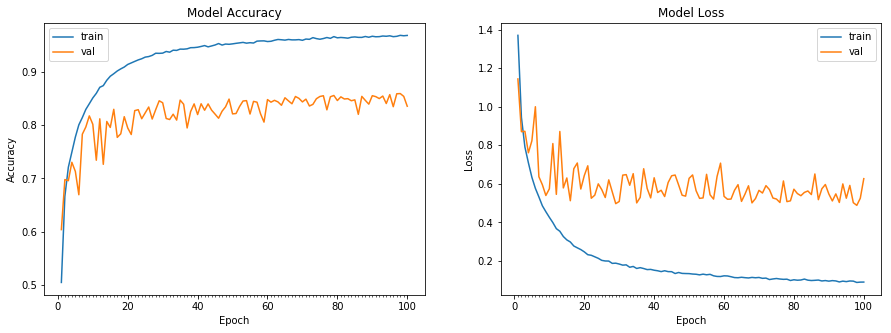

Accuracy on test data is: 83.58


In [0]:
from keras.preprocessing.image import ImageDataGenerator
random_erasing = True
pixel_level = False

datagen = ImageDataGenerator(zoom_range=0.0, 
                             horizontal_flip=False,
                             preprocessing_function=get_random_eraser(v_l=0, v_h=1, pixel_level=pixel_level))

# train the model
start = time.time()
# Train the model
model_info = model.fit_generator(datagen.flow(train_features, train_labels, batch_size = 128),
                                 samples_per_epoch = train_features.shape[0], nb_epoch = 100,
                                 callbacks=[checkpoint],validation_data = (test_features, test_labels), verbose=0)
end = time.time()
print ("Model took %0.2f seconds to train"%(end - start))
# plot model history
plot_model_history(model_info)
# compute test accuracy
print ("Accuracy on test data is: %0.2f"%accuracy(test_features, test_labels, model))

In [0]:
validation_data = datagen.flow(test_features, test_labels,batch_size=128,shuffle=False)

In [0]:
Y_pred = model.predict_generator(validation_data, steps=np.ceil(test_features.shape[0]/128), verbose=0)
y_pred = np.argmax(Y_pred, axis=1)

In [0]:
import pandas as pd
d = {'pred': np.argmax(Y_pred,axis=1), 'true': np.argmax(test_labels,axis=1)} #axis=1!important!
df = pd.DataFrame(data=d)

#looking at wrong predicted values(For 1! you can change it.)
#array1 = np.array(df[(df.pred != df.true) & (df.true==1)].index)
#print(array1)

# shows total mistakes
df2 = df[(df.pred != df.true)]
df2

df2.shape

(1913, 2)

In [0]:
df2

,pred,true
7,2,6
22,0,4
24,4,5
32,2,4
33,2,5
34,0,9
35,8,2
47,0,9
52,3,0
57,2,7


In [0]:
df3 = df2.reset_index(drop=True)
df3

,pred,true
0,2,6
1,0,4
2,4,5
3,2,4
4,2,5
5,0,9
6,8,2
7,0,9
8,3,0
9,2,7


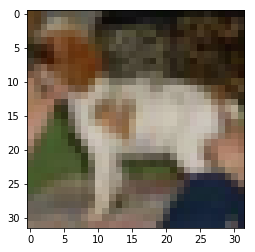

In [0]:
plt.imshow(test_features[12])

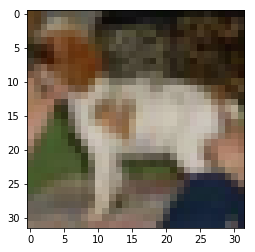

In [0]:
plt.imshow(test_features[12],cmap="gray")
plt.axis("on")
plt.show()

In [0]:
test_features[12].shape[0]

32

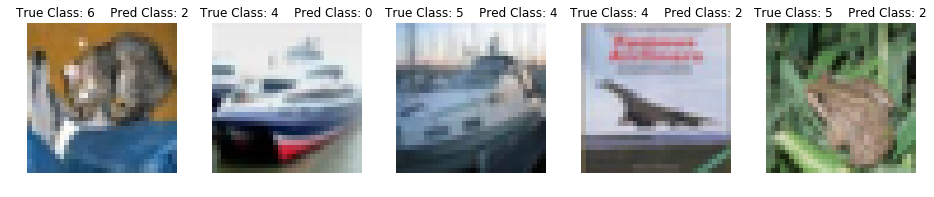

In [0]:
plt.figure(figsize = (16,16))

for i in range(5):
    plt.subplot(5, 5,i+1)
    img = test_features[df3.index[i]]
    #img = img.reshape((28,28))
    plt.imshow(img, cmap='gray')
    plt.title("True Class: " + str(df3["true"].iloc[i])+"    Pred Class: " + str(df3["pred"].iloc[i]))
    plt.axis('off')
    
plt.show()

In [0]:
# For retrieving the saved best results
from google.colab import drive
drive.mount('/content/gdrive')

Go to this URL in a browser: https://accounts.google.com/o/oauth2/auth?client_id=947318989803-6bn6qk8qdgf4n4g3pfee6491hc0brc4i.apps.googleusercontent.com&redirect_uri=urn%3Aietf%3Awg%3Aoauth%3A2.0%3Aoob&scope=email%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdocs.test%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fdrive.photos.readonly%20https%3A%2F%2Fwww.googleapis.com%2Fauth%2Fpeopleapi.readonly&response_type=code

Enter your authorization code:
··········
Mounted at /content/gdrive


In [0]:
cd /content/gdrive/My\ Drive/Assignment9B

/content/gdrive/My Drive/Assignment9B


In [0]:
model.load_weights('epochs:098-val_acc:0.860.hdf5')

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
import keras.backend as K
import numpy as np
import cv2
import sys



In [0]:
from keras.datasets import cifar10
(train_features, train_labels), (test_features, test_labels) = cifar10.load_data()
num_train, img_channels, img_rows, img_cols =  train_features.shape
num_test, _, _, _ =  test_features.shape
num_classes = len(np.unique(train_labels))

In [0]:
img=test_features[df3.index[26]]
#img = cv2.resize(img,(224,224))
x = image.img_to_array(img)
x = np.expand_dims(x, axis=0)
x = preprocess_input(x)

In [0]:
preds = model.predict(x)
class_idx = np.argmax(preds[0])
class_output = model.output[:, class_idx]
last_conv_layer = model.get_layer("conv2d_8")

In [0]:
grads = K.gradients(class_output, last_conv_layer.output)[0]
pooled_grads = K.mean(grads, axis=(0, 1, 2))
iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
pooled_grads_value, conv_layer_output_value = iterate([x])
for i in range(48):
    conv_layer_output_value[:, :, i] *= pooled_grads_value[i]

In [0]:
heatmap = np.mean(conv_layer_output_value, axis=-1)
heatmap = np.maximum(heatmap, 0)
heatmap /= np.max(heatmap)

/usr/local/lib/python3.6/dist-packages/ipykernel_launcher.py:3: RuntimeWarning: invalid value encountered in true_divide
  This is separate from the ipykernel package so we can avoid doing imports until


,pred,true
0,2,6
1,0,4
2,4,5
3,2,4
4,2,5
5,0,9
6,8,2
7,0,9
8,3,0
9,2,7


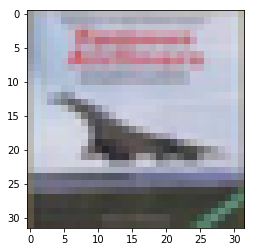

In [0]:
plt.imshow(test_features[df3.index[3]])

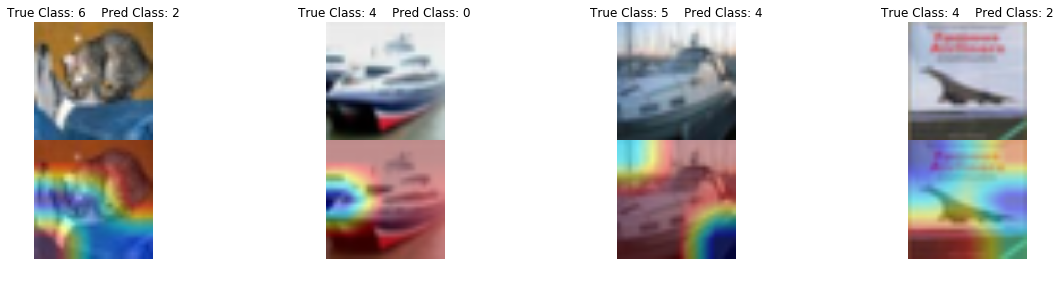

In [0]:
from keras.applications.vgg16 import VGG16, preprocess_input, decode_predictions
from keras.preprocessing import image
from google.colab.patches import cv2_imshow
import keras.backend as K
import numpy as np
import cv2
import sys

plt.figure(figsize = (20,20))

for i in range(4):
    plt.subplot(4,4,i+1)
    #ax1, ax2 = axes
    #plt.imshow(test_features[df2.index[i]])
    img = test_features[df3.index[i]]
    x = image.img_to_array(img)
    x = np.expand_dims(x, axis=0)
    x = preprocess_input(x)
    preds = model.predict(x)
    class_idx = np.argmax(preds[0])
    class_output = model.output[:, class_idx]
    last_conv_layer = model.get_layer("conv2d_8")
    grads = K.gradients(class_output, last_conv_layer.output)[0]
    pooled_grads = K.mean(grads, axis=(0, 1, 2))
    iterate = K.function([model.input], [pooled_grads, last_conv_layer.output[0]])
    pooled_grads_value, conv_layer_output_value = iterate([x])
    for j in range(48):
      conv_layer_output_value[:, :, i] *= pooled_grads_value[j]
    heatmap = np.mean(conv_layer_output_value, axis=-1)
    heatmap = np.maximum(heatmap, 0)
    heatmap /= np.max(heatmap)
    heatmap = cv2.resize(heatmap, (img.shape[1], img.shape[0]))
    heatmap = np.uint8(255 * heatmap)
    heatmap = cv2.applyColorMap(heatmap, cv2.COLORMAP_JET)
    superimposed_img = cv2.addWeighted(img, 0.6, heatmap, 0.4, 0)
    img= cv2.resize(img,(224,224))
    superimposed_img= cv2.resize(superimposed_img,(224,224))
    final = np.concatenate((img, superimposed_img), axis = 0)
    #cv2_imshow(img)
    #cv2_imshow(superimposed_img)
    #cv2.waitKey(0)
    #img = img.reshape((28,28))
    plt.imshow(final)
    #plt.subplot(5, 5, i+1), plt.imshow(superimposed_img)
    #plt.imshow(img)
    #plt.subplot(5,5,i+1)
    #plt.imshow(superimposed_img)
    plt.title("True Class: " + str(df3["true"].iloc[i])+"    Pred Class: " + str(df3["pred"].iloc[i]))
    plt.axis('off')
    
plt.show()
  
